# Tennis match prediction and playing strategy -- Exploratory Data Analysis

## Goal
1. Load data from output of data cleaning notebook
2. Ask and answer questions
3. Make conclusions from the observation

### Importing useful packages

In [375]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# set the dataframe displaying format
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

# supress warnings
import warnings
warnings.filterwarnings("ignore")

sns.set()
sns.set_style("whitegrid")

## Exploring raw data
We will first explore some interesting fact and relationship between variables in our raw data without labels.

### Load data
We will load the processed `data_all_processed` and `data_since_2009_processed` data from the previous data cleaning and wrangling notebook.

In [376]:
data_all = pd.read_csv('../Data/data_all_processed.csv')
data_since_2009 = pd.read_csv('../Data/data_since_2009_processed.csv')

In [377]:
# check all the data size
print(data_all.shape)
print(data_since_2009.shape)

(66068, 99)
(25337, 99)


In [378]:
# display the examples of all data
print('data_all')
display(data_all.sample(5))
print('data_since_2009')
display(data_since_2009.sample(5))

data_all


,match_id,index,tourney_year_id,tourney_order_x,tourney_round_name,round_order,match_order,winner_name,winner_player_id,loser_name,loser_player_id,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,winner_ranking,loser_ranking,winner_ranking_points,loser_ranking_points,tourney_order_y,match_duration,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,winner_first_serve_points_won,winner_first_serve_points_total,winner_second_serve_points_won,winner_second_serve_points_total,winner_break_points_saved,winner_break_points_serve_total,winner_service_points_won,winner_service_points_total,winner_first_serve_return_won,winner_first_serve_return_total,winner_second_serve_return_won,winner_second_serve_return_total,winner_break_points_converted,winner_break_points_return_total,winner_service_games_played,winner_return_games_played,winner_return_points_won,winner_return_points_total,winner_total_points_won,winner_total_points_total,loser_aces,loser_double_faults,loser_first_serves_in,loser_first_serves_total,loser_first_serve_points_won,loser_first_serve_points_total,loser_second_serve_points_won,loser_second_serve_points_total,loser_break_points_saved,loser_break_points_serve_total,loser_service_points_won,loser_service_points_total,loser_first_serve_return_won,loser_first_serve_return_total,loser_second_serve_return_won,loser_second_serve_return_total,loser_break_points_converted,loser_break_points_return_total,loser_service_games_played,loser_return_games_played,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total,tourney_year,tourney_order,tourney_name,tourney_id,tourney_slug,tourney_location,tourney_dates,tourney_month,tourney_day,tourney_singles_draw,tourney_doubles_draw,tourney_conditions,tourney_surface,tourney_fin_commit,tourney_url_suffix,singles_winner_name,singles_winner_url,singles_winner_player_slug,singles_winner_player_id,doubles_winner_1_name,doubles_winner_1_url,doubles_winner_1_player_slug,doubles_winner_1_player_id,doubles_winner_2_name,doubles_winner_2_url,doubles_winner_2_player_slug,doubles_winner_2_player_id
17238,1993-434-v014-a176,8050,1993-434,32,Round of 16,4,8,Christo Van Rensburg,v014,Jan Apell,a176,76(3) 64,2,0,13,10,1,0,119.0,174.0,0.0,0.0,30,103.0,6.0,6.0,43.0,70.0,35.0,43.0,13.0,27.0,1.0,3.0,48.0,70.0,18.0,53.0,14.0,24.0,3.0,7.0,11.0,11.0,32.0,77.0,80.0,147.0,5.0,4.0,53.0,77.0,35.0,53.0,10.0,24.0,4.0,7.0,45.0,77.0,8.0,43.0,14.0,27.0,2.0,3.0,11.0,11.0,22.0,70.0,67.0,147.0,1993,32,Seoul,434.0,seoul,Seoul,1993.04.19,4.0,19.0,32,32,Outdoor,Hard,"$200,000",/en/scores/archive/seoul/434/1993/results,Chuck Adams,/en/players/chuck-adams/a199/overview,chuck-adams,a199,Jan Apell,/en/players/jan-apell/a176/overview,jan-apell,a176,Peter Nyborg,/en/players/peter-nyborg/n107/overview,peter-nyborg,n107
51671,2001-741-f196-k310,35084,2001-741,37,Round of 32,5,2,Wayne Ferreira,f196,Stefan Koubek,k310,64 62,2,0,12,6,0,0,17.0,84.0,1465.0,503.0,36,53.0,5.0,1.0,20.0,43.0,15.0,20.0,14.0,23.0,0.0,2.0,29.0,43.0,15.0,38.0,18.0,29.0,5.0,9.0,9.0,9.0,33.0,67.0,62.0,110.0,0.0,3.0,38.0,67.0,23.0,38.0,11.0,29.0,4.0,9.0,34.0,67.0,5.0,20.0,9.0,23.0,2.0,2.0,9.0,9.0,14.0,43.0,48.0,110.0,2001,37,Nottingham,741.0,eastbourne,Nottingham,2001.06.18,6.0,18.0,32,32,Outdoor,Grass,"$400,000",/en/scores/archive/eastbourne/741/2001/results,Thomas Johansson,/en/players/thomas-johansson/j129/overview,thomas-johansson,j129,Donald Johnson,/en/players/donald-johnson/j098/overview,donald-johnson,j098,Jared Palmer,/en/players/jared-palmer/p233/overview,jared-palmer,p233
26244,2011-5053-b678-p467,70928,2011-5053,26,Round of 32,5,5,Michael Berrer,b678,Alexander Peya,p467,46 63 64,2,1,16,13,0,0,93.0,311.0,545.0,153.0,25,146.0,1.0,5.0,59.0,90.0,43.0,59.0,15.0,31.0,7.0,10.0,58.0,90.0,34.0,92.0,17.0,28.0,5.0,15.0,14.0,15.0,51.0,120.0,109.0,210.0,1.0,6.0,92.0,120.0,58.0,92.0,11.0,28.0,10.0,15.0,69.0,120.0,16.0,59.

data_since_2009


,match_id,index,tourney_year_id,tourney_order_x,tourney_round_name,round_order,match_order,winner_name,winner_player_id,loser_name,loser_player_id,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,winner_ranking,loser_ranking,winner_ranking_points,loser_ranking_points,tourney_order_y,match_duration,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,winner_first_serve_points_won,winner_first_serve_points_total,winner_second_serve_points_won,winner_second_serve_points_total,winner_break_points_saved,winner_break_points_serve_total,winner_service_points_won,winner_service_points_total,winner_first_serve_return_won,winner_first_serve_return_total,winner_second_serve_return_won,winner_second_serve_return_total,winner_break_points_converted,winner_break_points_return_total,winner_service_games_played,winner_return_games_played,winner_return_points_won,winner_return_points_total,winner_total_points_won,winner_total_points_total,loser_aces,loser_double_faults,loser_first_serves_in,loser_first_serves_total,loser_first_serve_points_won,loser_first_serve_points_total,loser_second_serve_points_won,loser_second_serve_points_total,loser_break_points_saved,loser_break_points_serve_total,loser_service_points_won,loser_service_points_total,loser_first_serve_return_won,loser_first_serve_return_total,loser_second_serve_return_won,loser_second_serve_return_total,loser_break_points_converted,loser_break_points_return_total,loser_service_games_played,loser_return_games_played,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total,tourney_year,tourney_order,tourney_name,tourney_id,tourney_slug,tourney_location,tourney_dates,tourney_month,tourney_day,tourney_singles_draw,tourney_doubles_draw,tourney_conditions,tourney_surface,tourney_fin_commit,tourney_url_suffix,singles_winner_name,singles_winner_url,singles_winner_player_slug,singles_winner_player_id,doubles_winner_1_name,doubles_winner_1_url,doubles_winner_1_player_slug,doubles_winner_1_player_id,doubles_winner_2_name,doubles_winner_2_url,doubles_winner_2_player_slug,doubles_winner_2_player_id
14981,2011-5014-l397-mb02,73224,2011-5014,58,Quarter-Finals,3,4,Feliciano Lopez,l397,Florian Mayer,mb02,62 64,2,0,12,6,0,0,28.0,23.0,1325.0,1645.0,56,69.0,10.0,2.0,24.0,49.0,19.0,24.0,19.0,25.0,1.0,1.0,38.0,49.0,15.0,36.0,11.0,23.0,3.0,6.0,9.0,9.0,26.0,59.0,64.0,108.0,2.0,3.0,36.0,59.0,21.0,36.0,12.0,23.0,3.0,6.0,33.0,59.0,5.0,24.0,6.0,25.0,0.0,1.0,9.0,9.0,11.0,49.0,44.0,108.0,2011,58,ATP World Tour Masters 1000 Shanghai,5014.0,shanghai,"Shanghai, China",2011.10.09,10.0,9.0,56,56,Outdoor,Hard,"$5,650,000",/en/scores/archive/shanghai/5014/2011/results,Andy Murray,/en/players/andy-murray/mc10/overview,andy-murray,mc10,Max Mirnyi,/en/players/max-mirnyi/m595/overview,max-mirnyi,m595,Daniel Nestor,/en/players/daniel-nestor/n210/overview,daniel-nestor,n210
19950,2015-429-b837-ta46,91152,2015-429,61,Round of 16,4,4,Marcos Baghdatis,b837,Bernard Tomic,ta46,76(7) 63,2,0,13,9,1,0,46.0,18.0,943.0,1675.0,59,88.0,15.0,5.0,45.0,74.0,34.0,45.0,14.0,29.0,4.0,6.0,48.0,74.0,20.0,48.0,10.0,22.0,3.0,3.0,11.0,10.0,30.0,70.0,78.0,144.0,6.0,4.0,48.0,70.0,28.0,48.0,12.0,22.0,0.0,3.0,40.0,70.0,11.0,45.0,15.0,29.0,2.0,6.0,10.0,11.0,26.0,74.0,66.0,144.0,2015,61,Stockholm,429.0,stockholm,"Stockholm, Sweden",2015.10.19,10.0,19.0,28,28,Indoor,Hard,"€604,155",/en/scores/archive/stockholm/429/2015/results,Tomas Berdych,/en/players/tomas-berdych/ba47/overview,tomas-berdych,ba47,Nicholas Monroe,/en/players/nicholas-monroe/mb49/overview,nicholas-monroe,mb49,Jack Sock,/en/players/jack-sock/sm25/overview,jack-sock,sm25
14294,2017-329-v708-r772,98809,2017-329,59,Round of 32,5,7,Jiri Vesely,v708,Albert Ramos-Vinolas,r772,62 26 63,2,1,14,11,0,0,62.0,25.0,825.0,1755.0,58,129.0,7.0,8.0,51.0,88.0,34.0,51.0,19.0,37.0,6.0,9.0,53.0,88.0,16.0,40.0,22.0,43.0,4.0,9.0,13.0,12.0,38.0,83.0,91.0,171.0,4.0,5.0,40

Since we are only interested in singles, we will drop all the double related columns.

In [379]:
drop_col = [col for col in data_all.columns if 'doubles' in col]
data_all.drop(drop_col, axis=1, inplace=True)
data_all_raw = data_all.copy()
data_after_2009 = data_all[data_all['index'] > 60167].copy()

In [380]:
# check the result
data_all.head()

,match_id,index,tourney_year_id,tourney_order_x,tourney_round_name,round_order,match_order,winner_name,winner_player_id,loser_name,loser_player_id,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,winner_ranking,loser_ranking,winner_ranking_points,loser_ranking_points,tourney_order_y,match_duration,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,winner_first_serve_points_won,winner_first_serve_points_total,winner_second_serve_points_won,winner_second_serve_points_total,winner_break_points_saved,winner_break_points_serve_total,winner_service_points_won,winner_service_points_total,winner_first_serve_return_won,winner_first_serve_return_total,winner_second_serve_return_won,winner_second_serve_return_total,winner_break_points_converted,winner_break_points_return_total,winner_service_games_played,winner_return_games_played,winner_return_points_won,winner_return_points_total,winner_total_points_won,winner_total_points_total,loser_aces,loser_double_faults,loser_first_serves_in,loser_first_serves_total,loser_first_serve_points_won,loser_first_serve_points_total,loser_second_serve_points_won,loser_second_serve_points_total,loser_break_points_saved,loser_break_points_serve_total,loser_service_points_won,loser_service_points_total,loser_first_serve_return_won,loser_first_serve_return_total,loser_second_serve_return_won,loser_second_serve_return_total,loser_break_points_converted,loser_break_points_return_total,loser_service_games_played,loser_return_games_played,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total,tourney_year,tourney_order,tourney_name,tourney_id,tourney_slug,tourney_location,tourney_dates,tourney_month,tourney_day,tourney_singles_draw,tourney_conditions,tourney_surface,tourney_fin_commit,tourney_url_suffix,singles_winner_name,singles_winner_url,singles_winner_player_slug,singles_winner_player_id
0,2017-322-a678-dc58,97087,2017-322,31,Round of 16,4,7,Kevin Anderson,a678,Jared Donaldson,dc58,63 67(7) 62,2,1,18,12,0,1,62.0,72.0,800.0,723.0,30,155.0,15.0,2.0,65.0,101.0,51.0,65.0,21.0,36.0,3.0,3.0,72.0,101.0,25.0,72.0,27.0,54.0,3.0,11.0,15.0,14.0,52.0,126.0,124.0,227.0,10.0,2.0,72.0,126.0,47.0,72.0,27.0,54.0,8.0,11.0,74.0,126.0,14.0,65.0,15.0,36.0,0.0,3.0,14.0,15.0,29.0,101.0,103.0,227.0,2017,31,Banque Eric Sturdza Geneva Open,322.0,geneva,"Geneva, Switzerland",2017.05.21,5.0,21.0,28,Outdoor,Clay,"€540,310",/en/scores/archive/geneva/322/2017/results,Stan Wawrinka,/en/players/stan-wawrinka/w367/overview,stan-wawrinka,w367
1,2017-322-w367-kb54,97075,2017-322,31,Semi-Finals,2,1,Stan Wawrinka,w367,Andrey Kuznetsov,kb54,63 76(4),2,0,13,9,1,0,3.0,85.0,5445.0,615.0,30,99.0,9.0,0.0,34.0,77.0,27.0,34.0,29.0,43.0,6.0,6.0,56.0,77.0,12.0,40.0,15.0,35.0,1.0,6.0,11.0,10.0,27.0,75.0,83.0,152.0,3.0,2.0,40.0,75.0,28.0,40.0,20.0,35.0,5.0,6.0,48.0,75.0,7.0,34.0,14.0,43.0,0.0,6.0,10.0,11.0,21.0,77.0,69.0,152.0,2017,31,Banque Eric Sturdza Geneva Open,322.0,geneva,"Geneva, Switzerland",2017.05.21,5.0,21.0,28,Outdoor,Clay,"€540,310",/en/scores/archive/geneva/322/2017/results,Stan Wawrinka,/en/players/stan-wawrinka/w367/overview,stan-wawrinka,w367
2,2017-322-c582-f444,97106,2017-322,31,1st Round Qualifying,7,2,Marco Chiudinelli,c582,Alejandro Falla,f444,75 76(3),2,0,14,11,1,0,188.0,294.0,289.0,170.0,30,107.0,5.0,0.0,51.0,78.0,36.0,51.0,15.0,27.0,2.0,4.0,51.0,78.0,18.0,48.0,17.0,34.0,3.0,9.0,12.0,12.0,35.0,82.0,86.0,160.0,1.0,1.0,48.0,82.0,30.0,48.0,17.0,34.0,6.0,9.0,47.0,82.0,15.0,51.0,12.0,27.0,2.0,4.0,12.0,12.0,27.0,78.0,74.0,160.0,2017,31,Banque Eric Sturdza Geneva Open,322.0,geneva,"Geneva, Switzerland",2017.05.21,5.0,21.0,28,Outdoor,Clay,"€540,310",/en/scores/archive/geneva/322/2017/results,Stan Wawrinka,/en/players/stan-wawrinka/w367/overview,stan-wawrinka,w367
3,2017-322-j386-r612,97089,2017-322,31,Round of 32,5,1,Steve Johnson,j386,Stephane Robert,r612,63 63,2,0,12,6,0,0,26.0,113.0,1565

### Univariate Analysis
Most of the variables in `data_all` are statistics of a certain match, it would not be too helpful for our future modeling to analyze the stat one by one on its own, it should be more helpful to find out the relationship between stats and the match outcome, since this is what we have more interests in. In this part, we will focus on the match and tournament scale to get to know more about our data instead of using individual stat.

#### Question 1: What are the match duration distribution of  every single match in this dataset? Is it close to normal?

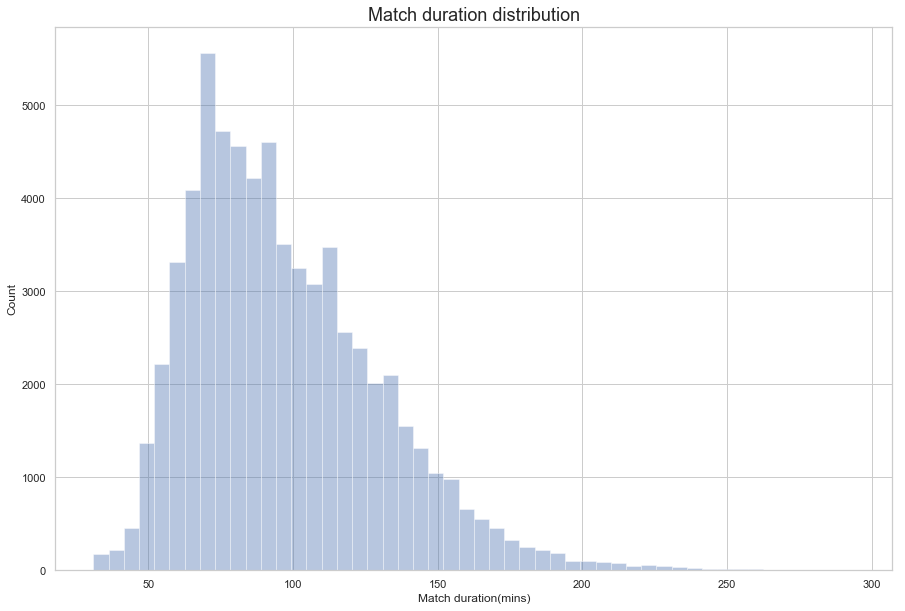

In [381]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax = sns.distplot(data_all['match_duration'], kde=False)
ax.set_title('Match duration distribution', size=18)
ax.set_ylabel('Count')
ax.set_xlabel('Match duration(mins)')
plt.show()

#### Answer: <br/><br/>From the graph above, we can see that the distribution of match duration is right skewed instead of normal, from the previous data cleaning/wrangling notebook, we have eliminated matches that are extremely long or unreasonbly short, in reality, it takes at least some time to finish one match, since the usual ATP matches requires at least two sets of win and the players level difference is not that much like an amateur vs pro, because a player needs to have a certain ranking to qualify for the main draw, even the qualify draw are composed of all pros, so it is unlikely to see 6:0 6:0 match, thus the lower bound of the match duration is not something close to 0(we have eliminated player retire cases already), on the other hand, the upper bound is theoretically unlimited, or at least has much more possible values, since players that have similar level could take a long time to finish the match.

#### Question 2: What are the magnitude of all the matches in the dataset? 

We will plot a bar chart for `tourney_singles_draw`.

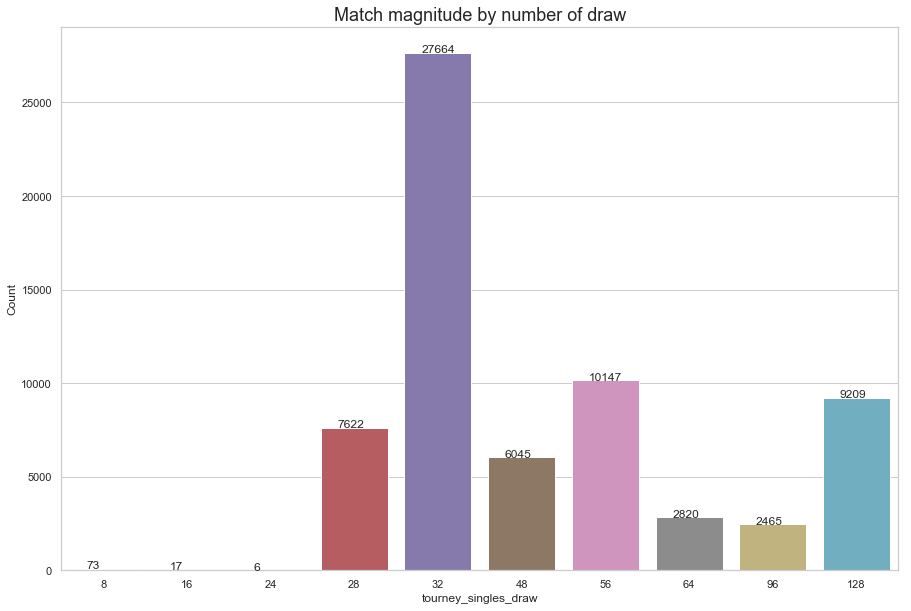

In [382]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax = sns.countplot(x='tourney_singles_draw', data=data_all)
ax.set_title('Match magnitude by number of draw', size=18)
ax.set_ylabel('Count')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), xy=(p.get_x()+0.2, p.get_height()))
plt.show()

#### Answer: <br/><br/>We can see from the graph that most of the tournaments are 32 draws, which requires player to win 5 matches in a row in the main draw, if we take a look of the [ATP tournament](https://www.atptour.com/en/tournaments), most of the ATP tournaments are either [ATP250](https://en.wikipedia.org/wiki/ATP_Tour_250) or [ATP500](https://en.wikipedia.org/wiki/ATP_Tour_500), which has majority 32 draws, only [Grand Slam](https://en.wikipedia.org/wiki/Grand_Slam_(tennis)) tournaments have 128 draws, we can also see there are 8 draws as well, which is the [ATP Finals](https://en.wikipedia.org/wiki/ATP_Finals), only the 8 best players of that year are able to participate in the event. There are also 16, 24 draws, this could be some tournament that no longer exist, [ATP Masters 1000](https://en.wikipedia.org/wiki/ATP_Tour_Masters_1000) have multiple number of draws depends on the tournament, like 56, 64, or 96. This could be an important feature for us in modeling step since it is a measurement of difficulty of a specific tournament.

### Bivariate Analysis
In this section we will dig out some important features that are more relevant to determine the outcome of matches. We will try to figure out the relationship between variables and see if we could find some trend.

#### Question 3: Does ranking reflects the recent performance of the player? How much?

Tennis has a ranking system that is based on the previous 12 month performance, tournaments are all point based and each round of the draw gives the player different points as well, the amount of points gained also depends on the magnitude of the tournament, for example, [Grand Slam](https://en.wikipedia.org/wiki/Grand_Slam_(tennis)) gives 2000 points for the champion. However, tennis has a single elimination draw, which means once lose, the player is out from the match, the champion is the only player that has not lose any single match in the main draw. Top players may fall in previous rounds, we will explore how relevant the ranking is to the match outcome. We might have expected the higher ranking player wins the match most of the time, by taking the average of the ranking, the `winner_ranking` should be lower(the lower the number, the higher the rank) than the `loser_ranking` on average.

In [3]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
# drop missing values 
data_all.dropna(inplace=True)
ax = data_all[['winner_ranking', 'loser_ranking']].mean().plot(kind='bar')
ax.set_title('Average ranking between winner and loser of all matches', size=18)
ax.set_xticklabels(['winner', 'loser'], fontsize=14)
ax.set_ylabel('Ranking', fontsize=14)
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), xy=(p.get_x()+0.21, p.get_height()+0.7), size=14)
plt.show()

NameError: name 'plt' is not defined

From the plot above, we can see that the average ranking of winner is indeed lower than the average ranking of loser by the difference of around 25, however, is it statistically significant? We will use hypothesis test to find out.

#### Hypothesis:
H<sub>0</sub>: Winner<sub>ranking</sub> = Loser<sub>ranking</sub> <br/>
H<sub>a</sub>: Winner<sub>ranking</sub> $\neq$ Loser<sub>ranking</sub> 


In [384]:
from scipy.stats import ttest_ind

t, p_val = ttest_ind(data_all['winner_ranking'], data_all['loser_ranking'], equal_var=False)
print('t statistics: {}'.format(t))
print('p value: {}'.format(p_val))

t statistics: -49.271757497703696
p value: 0.0


We can see the p-value is literally zero, which suggests that the ranking of winner and loser of has a significant mean difference at all matches, this is to be confirmed that using rank as an indicator in general to predict the outcome of the match would be better than random guessing.

#### Question 4: Follow by question 3, what are the chances of underdog to win the match of all tournament? What if we break into different surface? Different month?
We will use `winner_ranking` and `loser_ranking` to determine if the underdog won the match, we basically use a boolean mask to see if `winner_ranking` is greater than `loser_ranking`.

##### All matches

In [385]:
# add another column to indicate whether under dog wins or not
data_all['underdog_win'] = (data_all['winner_ranking'] > data_all['loser_ranking'])

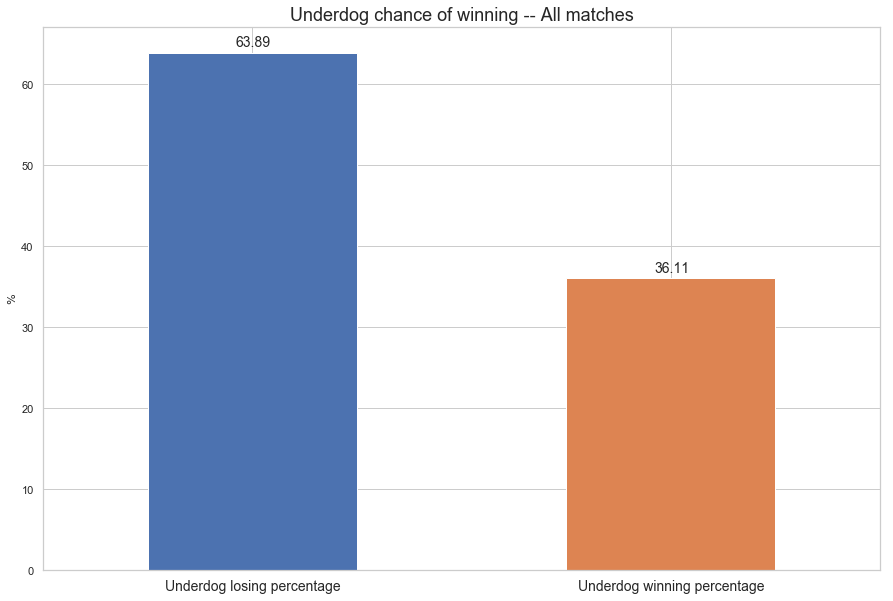

In [386]:
fig, ax = plt.subplots(1,1,figsize=(15, 10))
ax = (data_all['underdog_win'].value_counts(normalize=True)*100).plot(kind='bar')
ax.set_xticklabels(['Underdog losing percentage', 'Underdog winning percentage'], rotation=0, size=14)
ax.set_title('Underdog chance of winning -- All matches', size=18)
ax.set_ylabel('%')
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), xy=(p.get_x()+0.21, p.get_height()+0.7), size=14)
plt.show()

##### By surface

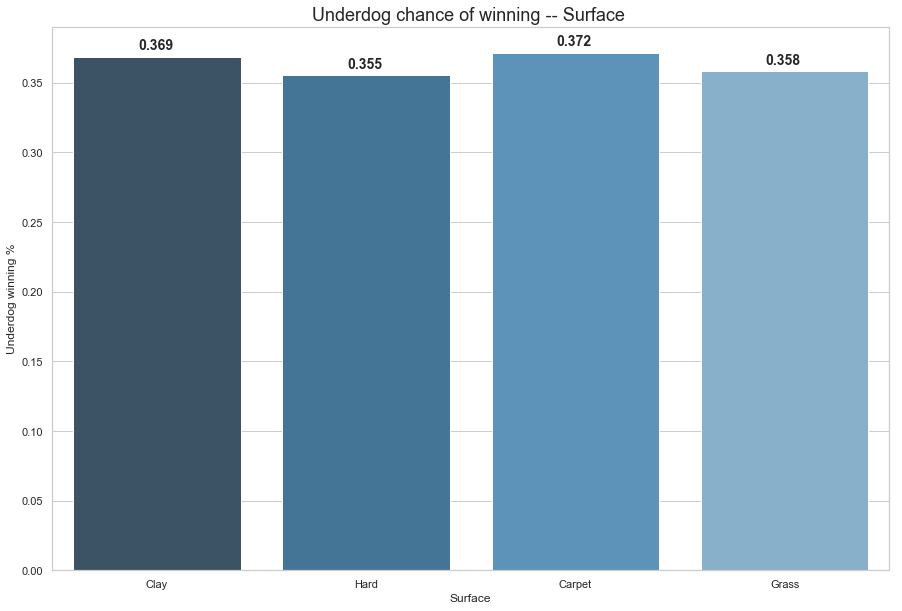

In [387]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax = sns.barplot(x='tourney_surface', y='underdog_win', data=data_all, \
                 palette="Blues_d", ci=None)
ax.set_title('Underdog chance of winning -- Surface ', size=18)
ax.set_ylabel('Underdog winning %')
ax.set_xlabel('Surface')
for p in ax.patches:
    
    ax.annotate('{:.3f}'.format(p.get_height()), \
                xy=(p.get_x()+0.31, p.get_height()+0.005), size=14, weight='semibold')
plt.show() 

##### By month

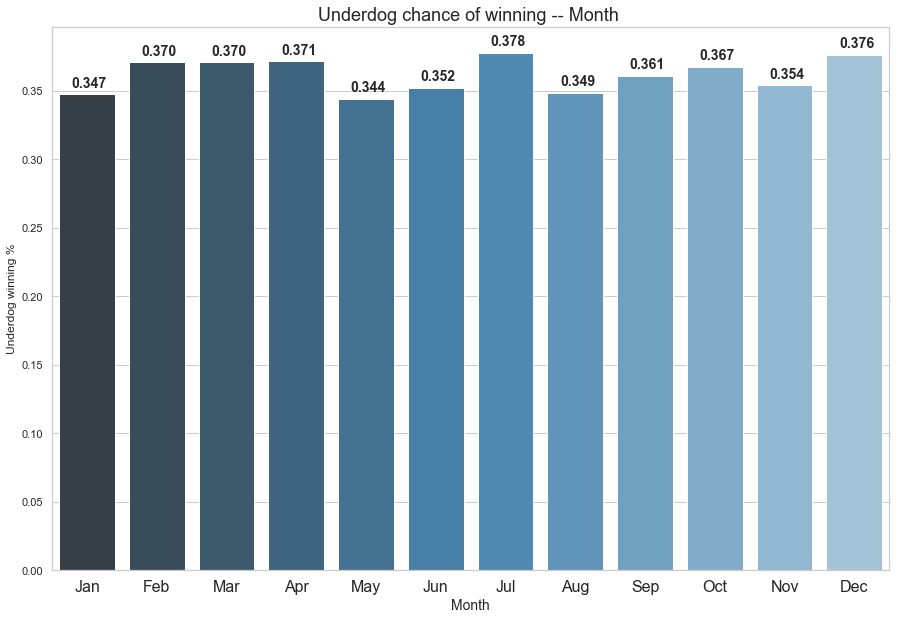

In [388]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax = sns.barplot(x='tourney_month', y='underdog_win', data=data_all, \
                 palette="Blues_d", ci=None)
ax.set_title('Underdog chance of winning -- Month ', size=18)
ax.set_ylabel('Underdog winning %')
ax.set_xlabel('Month', size=14)
for p in ax.patches:
    
    ax.annotate('{:.3f}'.format(p.get_height()), \
                xy=(p.get_x()+0.18, p.get_height()+0.005), size=14, weight='semibold')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], size=16)
plt.show() 

##### By tournament magnitude

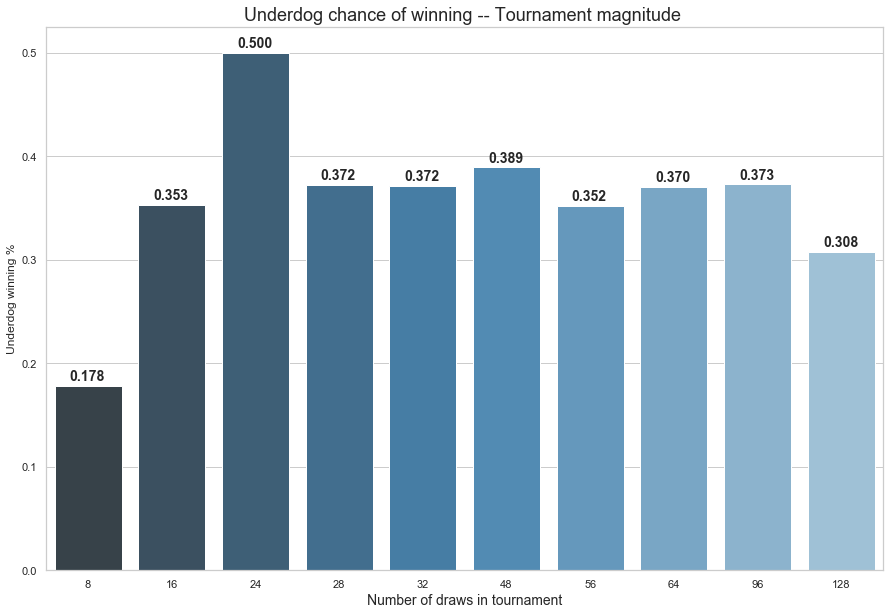

In [389]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax = sns.barplot(x='tourney_singles_draw', y='underdog_win', data=data_all, \
                 palette="Blues_d", ci=None)
ax.set_title('Underdog chance of winning -- Tournament magnitude ', size=18)
ax.set_ylabel('Underdog winning %')
ax.set_xlabel('Number of draws in tournament', size=14)
for p in ax.patches:
    
    ax.annotate('{:.3f}'.format(p.get_height()), \
                xy=(p.get_x()+0.18, p.get_height()+0.005), size=14, weight='semibold')

plt.show() 

We can see that 24-draw tournament looks a little weird since the number is 0.500, we will double check all the data that has 24-draw tournament.

In [390]:
data_all[data_all['tourney_singles_draw']==24]

,match_id,index,tourney_year_id,tourney_order_x,tourney_round_name,round_order,match_order,winner_name,winner_player_id,loser_name,loser_player_id,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,winner_ranking,loser_ranking,winner_ranking_points,loser_ranking_points,tourney_order_y,match_duration,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,winner_first_serve_points_won,winner_first_serve_points_total,winner_second_serve_points_won,winner_second_serve_points_total,winner_break_points_saved,winner_break_points_serve_total,winner_service_points_won,winner_service_points_total,winner_first_serve_return_won,winner_first_serve_return_total,winner_second_serve_return_won,winner_second_serve_return_total,winner_break_points_converted,winner_break_points_return_total,winner_service_games_played,winner_return_games_played,winner_return_points_won,winner_return_points_total,winner_total_points_won,winner_total_points_total,loser_aces,loser_double_faults,loser_first_serves_in,loser_first_serves_total,loser_first_serve_points_won,loser_first_serve_points_total,loser_second_serve_points_won,loser_second_serve_points_total,loser_break_points_saved,loser_break_points_serve_total,loser_service_points_won,loser_service_points_total,loser_first_serve_return_won,loser_first_serve_return_total,loser_second_serve_return_won,loser_second_serve_return_total,loser_break_points_converted,loser_break_points_return_total,loser_service_games_played,loser_return_games_played,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total,tourney_year,tourney_order,tourney_name,tourney_id,tourney_slug,tourney_location,tourney_dates,tourney_month,tourney_day,tourney_singles_draw,tourney_conditions,tourney_surface,tourney_fin_commit,tourney_url_suffix,singles_winner_name,singles_winner_url,singles_winner_player_slug,singles_winner_player_id,underdog_win
65984,2007-505-h390-m655,51661,2007-505,8,Finals,1,1,Luis Horna,h390,Nicolas Massu,m655,75 63,2,0,13,8,0,0,66.0,42.0,550.0,825.0,7,112.0,1.0,1.0,64.0,76.0,41.0,64.0,8.0,12.0,0.0,1.0,49.0,76.0,15.0,46.0,7.0,13.0,3.0,4.0,11.0,10.0,22.0,59.0,71.0,135.0,4.0,0.0,46.0,59.0,31.0,46.0,6.0,13.0,1.0,4.0,37.0,59.0,23.0,64.0,4.0,12.0,1.0,1.0,10.0,11.0,27.0,76.0,64.0,135.0,2007,8,Viña del Mar,505.0,vina-del-mar,Vina Del Mar,2007.01.29,1.0,29.0,24,Outdoor,Clay,"$448,000",/en/scores/archive/vina-del-mar/505/2007/results,Luis Horna,/en/players/luis-horna/h390/overview,luis-horna,h390,True
65985,2007-505-p305-g602,51692,2007-505,8,2nd Round Qualifying,5,1,Albert Portas,p305,Andre Ghem,g602,62 36 61,2,1,15,9,0,0,140.0,195.0,328.0,210.0,7,118.0,7.0,4.0,55.0,102.0,42.0,55.0,20.0,47.0,10.0,11.0,62.0,102.0,14.0,37.0,18.0,40.0,4.0,7.0,12.0,12.0,32.0,77.0,94.0,179.0,2.0,3.0,37.0,77.0,23.0,37.0,22.0,40.0,3.0,7.0,45.0,77.0,13.0,55.0,27.0,47.0,1.0,11.0,12.0,12.0,40.0,102.0,85.0,179.0,2007,8,Viña del Mar,505.0,vina-del-mar,Vina Del Mar,2007.01.29,1.0,29.0,24,Outdoor,Clay,"$448,000",/en/scores/archive/vina-del-mar/505/2007/results,Luis Horna,/en/players/luis-horna/h390/overview,luis-horna,h390,False
65986,2007-505-l480-s876,51697,2007-505,8,1st Round Qualifying,6,3,Marc Lopez,l480,Flavio Saretta,s876,64 16 75,2,1,14,15,0,0,207.0,153.0,195.0,295.0,7,142.0,3.0,1.0,58.0,93.0,37.0,58.0,12.0,35.0,9.0,14.0,49.0,93.0,23.0,60.0,16.0,30.0,5.0,8.0,14.0,15.0,39.0,90.0,88.0,183.0,1.0,0.0,60.0,90.0,37.0,60.0,14.0,30.0,3.0,8.0,51.0,90.0,21.0,58.0,23.0,35.0,5.0,14.0,15.0,14.0,44.0,93.0,95.0,183.0,2007,8,Viña del Mar,505.0,vina-del-mar,Vina Del Mar,2007.01.29,1.0,29.0,24,Outdoor,Clay,"$448,000",/en/scores/archive/vina-del-mar/505/2007/results,Luis Horna,/en/players/luis-horna/h390/overview,luis-horna,h390,True
65987,2007-505-h472-v339,51696,2007-505,8,1st Round Qualifying,6,2,Oscar Hernandez,h472,Simone Vagnozzi,v339,64 64,2,0,12,8,0,0,133.0,210.0,341.0,193.0,7,76.0,0.0,0.0,39.0,55.0,31.0,39.0,10.0,16.0,1.

There are only 6 matches recorded, which can explain the number stood out so unusually.

#### Answer: <br/><br/>We have separated the plots based on the conditions, we can see that in overall, underdog only has around 36.11% of winning percentage, if we further break it down into different surface, the hard court has less chance of winning percentage for underdog (35.5%) vs carpet(37.2%). When breaking into different months, we were expecting the top rank players may be more tired toward the end of the season and might have more chances to get knock out by the underdogs, however, the trend was not that obvious, we can see that the highest underdog winning percentage happens in July, come down in August and gradually goes up again toward the end. Lastly, we checked whether different tournament magnitude will make any difference, the result is kind of what we have expected, top rank players like [Big Four](https://en.wikipedia.org/wiki/Big_Four_(tennis) ) are really consistent in grand slam tournament, thus the winner percentage of underdog is only 30.8%, in ATP final, only the top 8 best players of the year can participate, the underdog winning percentage is even lower, this suggested it is even harder to beat the top four players for underdogs. 24-draw match has the highest 0.5, however, the sample size is only 6, which can be ignored. We will do another follow up hypothesis next to see whether the difference is statistically difference. 

#### Question 5: Follow by question 4, are the difference between underdog winning percentage under different conditions statistically significant?

We will apply [ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance) to analyze whether there exists at least one pair of population that are significant different from each other in the group, the hypothesis is the following:

##### Hypothesis<br/>
**H<sub>0</sub>** :  Underdog<sub>carpet</sub> = Underdog<sub>clay</sub> = Underdog<sub>hard</sub> = Underdog<sub>grass</sub><br/>
**H<sub>a</sub>** :  at least one pair is significant different from each other

In [391]:
# import package
from scipy.stats import f_oneway
carpet = data_all[data_all['tourney_surface'] == 'Carpet']['underdog_win']
clay = data_all[data_all['tourney_surface'] == 'Clay']['underdog_win']
grass = data_all[data_all['tourney_surface'] == 'Grass']['underdog_win']
hard = data_all[data_all['tourney_surface'] == 'Hard']['underdog_win']

f_score, p_val = f_oneway(carpet, clay, grass, hard)
print(f'f score:{f_score}')
print(f'p value:{p_val}')

f score:4.172215733627004
p value:0.005810456093153208


We can see that p value is quite small, suggesting there exists at least one pair of data means that are significant different from each other, we will double confirm it by using a t-test. We will pick `hard` vs `carpet` and `hard` vs `clay` since they appeared to have larger mean difference as we shown in question 4.

##### Hypothesis<br/>
1. 
**H<sub>0</sub>** :  Underdog<sub>hard</sub> = Underdog<sub>carpet</sub><br/>
**H<sub>a</sub>** :  Underdog<sub>hard</sub> $\neq$ Underdog<sub>carpet</sub><br/>
2. 
**H<sub>0</sub>** :  Underdog<sub>hard</sub> = Underdog<sub>clay</sub><br/>
**H<sub>a</sub>** :  Underdog<sub>hard</sub> $\neq$ Underdog<sub>clay</sub><br/>

In [392]:
# import package
from scipy.stats import ttest_ind

# hard vs carpet
t_stat, p_val = ttest_ind(hard, carpet, equal_var=False)
print('Hard vs Carpet')
print('-'*50)
print(f't staat:{t_stat}')
print(f'p value:{p_val}')
print('\n')
# hard vs clay
t_stat, p_val = ttest_ind(hard, clay, equal_var=False)
print('Hard vs Clay')
print('-'*50)
print(f't stat:{t_stat}')
print(f'p value:{p_val}')

Hard vs Carpet
--------------------------------------------------
t staat:-1.9813567993086958
p value:0.047609799901674535


Hard vs Clay
--------------------------------------------------
t stat:-3.219867910000185
p value:0.0012833540445372526


Next, we will apply the same idea on underdog winning percentage separated by month.

##### Hypothesis<br/>
**H<sub>0</sub>** :  Underdog<sub>Jan</sub> = Underdog<sub>Feb</sub> = Underdog<sub>Mar</sub> = Underdog<sub>Apr</sub> = Underdog<sub>May</sub> = Underdog<sub>Jun</sub> = Underdog<sub>Jul</sub> = Underdog<sub>Aug</sub> = Underdog<sub>Sep</sub> = Underdog<sub>Oct</sub> = Underdog<sub>Nov</sub> = Underdog<sub>Dec</sub><br/>
**H<sub>a</sub>** :  at least one pair is significant different from each other

In [393]:
months = {}
for month in range(1,13):
    months[month] = data_all[data_all['tourney_month'] == month]['underdog_win']

f_score, p_val = f_oneway(months[1], months[2], months[3], months[4],
                          months[5], months[6], months[7], months[8],
                          months[9], months[10], months[11], months[12],)
print(f'f score:{f_score}')
print(f'p value:{p_val}')

f score:3.622272977322146
p value:3.8165018792720186e-05


Again, we can see that p value is relatively small, thus we can conclude that there exists at least one pair of data means that are significant different from each other, we will pick `Jul` vs `May` and `Jul` vs `Jan` for t-test.

##### Hypothesis<br/>
1. 
**H<sub>0</sub>** :  Underdog<sub>Jul</sub> = Underdog<sub>May</sub><br/>
**H<sub>a</sub>** :  Underdog<sub>Jul</sub> $\neq$ Underdog<sub>May</sub><br/>
2. 
**H<sub>0</sub>** :  Underdog<sub>Jul</sub> = Underdog<sub>Jan</sub><br/>
**H<sub>a</sub>** :  Underdog<sub>Jul</sub> $\neq$ Underdog<sub>Jan</sub><br/>

In [394]:
# Jul vs May
t_stat, p_val = ttest_ind(months[7], months[5], equal_var=False)
print('Jul vs May')
print('-'*50)
print(f't stat:{t_stat}')
print(f'p value:{p_val}')
print('\n')
# Jul vs Jan
t_stat, p_val = ttest_ind(months[7], months[1], equal_var=False)
print('Jul vs Jan')
print('-'*50)
print(f't stat:{t_stat}')
print(f'p value:{p_val}')

Jul vs May
--------------------------------------------------
t stat:4.178524162311056
p value:2.95153719098089e-05


Jul vs Jan
--------------------------------------------------
t stat:3.659919655446232
p value:0.00025328836281883715


#### Answer: <br/><br/>In this question we performed both ANOVA and t-test to find out if the graph we have plotted in question 4 is statistically significant or not, we used ANOVA first to see whether there exists at least a pair of data that has mean significant from each other, in different court surface, we found a relatively small p value, even with alpha = 0.01, we are able to reject the null hypothesis, we then picked some pairs that look to have more mean difference and perform another t-test, the p value we found in hard vs carpet is close to 5% and hard vs clay is around 0.1%, thus we concluded that the underdog winning percentage is truly different between hard court vs carpet court and hard court vs clay court, to be more precise, it is more different between hard vs clay than hard vs carpet, so it makes the underdog more difficult to beat top players on hard court than on clay court.<br/><br/> We applied the same idea on different months comparison, the results showed that it is harder for underdogs to beat top players in January and May than in July.

#### Question 6: What are the chances to beat "Tennis Big 4" in Grand Slam? In ATP Master 1000? 
We have mentioned about [Big Four](https://en.wikipedia.org/wiki/Big_Four_(tennis)) in previous question, those four players are [Roger Federer](https://en.wikipedia.org/wiki/Roger_Federer), [Rafael Nadal](https://en.wikipedia.org/wiki/Rafael_Nadal), [Novak Djokovic](https://en.wikipedia.org/wiki/Novak_Djokovic) and [Andy Murray](https://en.wikipedia.org/wiki/Andy_Murray), they are known for their dominance and consistency of all tennis big tournaments, we will find out how hard it is to beat the big four? We will break down into Grand Slam, ATP Master 1000, since those are largest 13 tournaments of a single season, we exclude ATP Final here since there are not many data points.

In [395]:
# assign subset of data using tourney_single_draw variable
# use tourney_single_draw to pull our grand slam and atp final data
grand_slam = data_all[data_all['tourney_singles_draw'] == 128]


# use tourney_name to pull out atp master 1000
atp_1000 = data_all[data_all['tourney_name'].str.contains(r'1000|[mM]asters')]

In [396]:
# filter the matches that only big 4 is part of it, we have previously looked up their ids
pattern = r'f324|n409|d643|mc10'
grand_slam_big4 = grand_slam[(grand_slam['winner_player_id'].str.contains(pattern)) | \
                        (grand_slam['loser_player_id'].str.contains(pattern))]

atp_1000_big4 = atp_1000[(atp_1000['winner_player_id'].str.contains(pattern)) | \
                        (atp_1000['loser_player_id'].str.contains(pattern))]

##### Exclude Big 4 vs Big 4
Since we are more interested in how difficult for players other than Big 4 themselves to beat Big 4 in a match, we will exclude the matches that both players are big 4

In [397]:
# exclude big4 vs big4
grand_slam_big4 = grand_slam_big4[~((grand_slam_big4['winner_player_id'].str.contains(pattern)) & \
                        (grand_slam_big4['loser_player_id'].str.contains(pattern)))]

atp_1000_big4 = atp_1000_big4[~((atp_1000_big4['winner_player_id'].str.contains(pattern)) & \
                        (atp_1000_big4['loser_player_id'].str.contains(pattern)))]

In [398]:
# add another columns if big 4 lost the match or not
grand_slam_big4['big4_lost'] = grand_slam_big4['loser_player_id'].str.contains(pattern)
atp_1000_big4['big4_lost'] = atp_1000_big4['loser_player_id'].str.contains(pattern)

##### Grand Slam

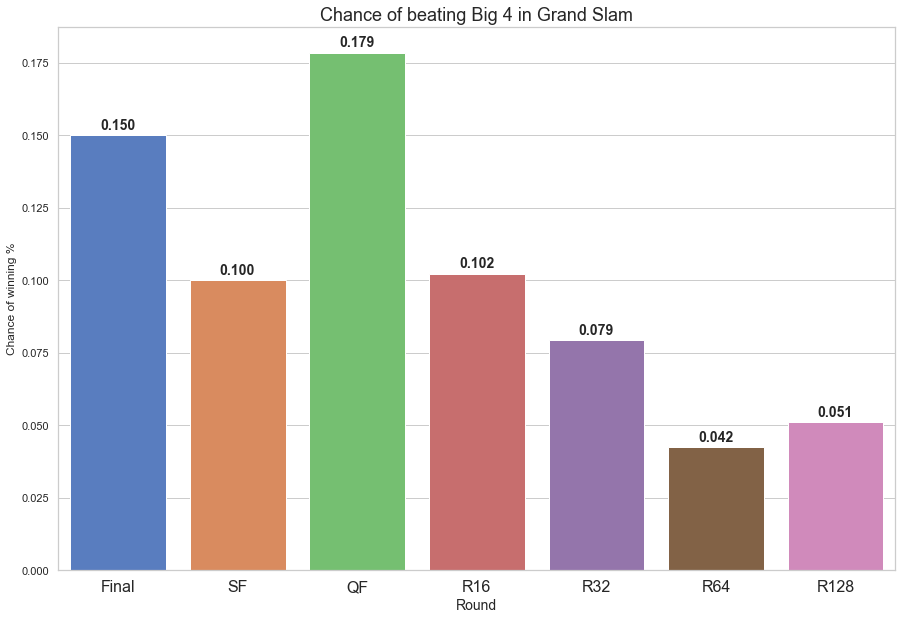

In [399]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax = sns.barplot(x='round_order', y='big4_lost', data=grand_slam_big4, \
                 palette="muted", ci=None)
ax.set_title('Chance of beating Big 4 in Grand Slam', size=18)
ax.set_ylabel('Chance of winning %')
ax.set_xlabel('Round', size=14)
for p in ax.patches:
    
    ax.annotate('{:.3f}'.format(p.get_height()), \
                xy=(p.get_x()+0.25, p.get_height()+0.002), size=14, weight='semibold')
ax.set_xticklabels(['Final', 'SF', 'QF', 'R16', 'R32', 'R64', 'R128'], size=16)
plt.show() 

##### ATP Masters 1000

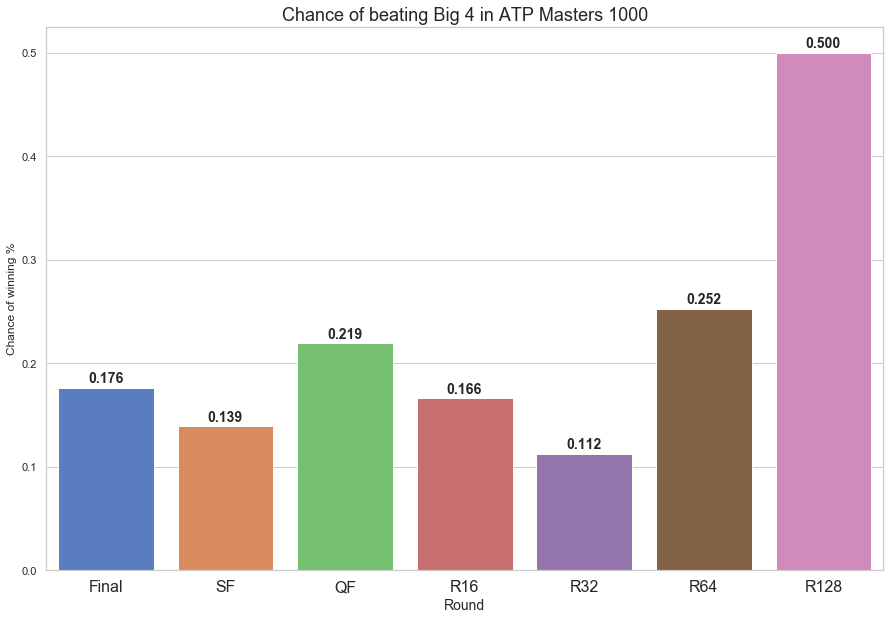

In [400]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax = sns.barplot(x='round_order', y='big4_lost', data=atp_1000_big4, \
                 palette="muted", ci=None)
ax.set_title('Chance of beating Big 4 in ATP Masters 1000', size=18)
ax.set_ylabel('Chance of winning %')
ax.set_xlabel('Round', size=14)
for p in ax.patches:
    
    ax.annotate('{:.3f}'.format(p.get_height()), \
                xy=(p.get_x()+0.25, p.get_height()+0.005), size=14, weight='semibold')
ax.set_xticklabels(['Final', 'SF', 'QF', 'R16', 'R32', 'R64', 'R128'], size=16)
plt.show() 

It is interesting to see an ATP Master 1000 has round R128, we will check what those matches are.

In [401]:
atp_1000_big4[atp_1000_big4['round_order'] == 7]

,match_id,index,tourney_year_id,tourney_order_x,tourney_round_name,round_order,match_order,winner_name,winner_player_id,loser_name,loser_player_id,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,winner_ranking,loser_ranking,winner_ranking_points,loser_ranking_points,tourney_order_y,match_duration,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,winner_first_serve_points_won,winner_first_serve_points_total,winner_second_serve_points_won,winner_second_serve_points_total,winner_break_points_saved,winner_break_points_serve_total,winner_service_points_won,winner_service_points_total,winner_first_serve_return_won,winner_first_serve_return_total,winner_second_serve_return_won,winner_second_serve_return_total,winner_break_points_converted,winner_break_points_return_total,winner_service_games_played,winner_return_games_played,winner_return_points_won,winner_return_points_total,winner_total_points_won,winner_total_points_total,loser_aces,loser_double_faults,loser_first_serves_in,loser_first_serves_total,loser_first_serve_points_won,loser_first_serve_points_total,loser_second_serve_points_won,loser_second_serve_points_total,loser_break_points_saved,loser_break_points_serve_total,loser_service_points_won,loser_service_points_total,loser_first_serve_return_won,loser_first_serve_return_total,loser_second_serve_return_won,loser_second_serve_return_total,loser_break_points_converted,loser_break_points_return_total,loser_service_games_played,loser_return_games_played,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total,tourney_year,tourney_order,tourney_name,tourney_id,tourney_slug,tourney_location,tourney_dates,tourney_month,tourney_day,tourney_singles_draw,tourney_conditions,tourney_surface,tourney_fin_commit,tourney_url_suffix,singles_winner_name,singles_winner_url,singles_winner_player_slug,singles_winner_player_id,underdog_win,big4_lost
10833,2000-403-f324-g354,31261,2000-403,20,Round of 128,7,10,Roger Federer,f324,Justin Gimelstob,g354,75 63,2,0,13,8,0,0,53.0,99.0,753.0,422.0,19,73.0,7.0,1.0,42.0,67.0,29.0,42.0,19.0,25.0,2.0,2.0,48.0,67.0,14.0,41.0,8.0,19.0,2.0,6.0,11.0,10.0,22.0,60.0,70.0,127.0,2.0,5.0,41.0,60.0,27.0,41.0,11.0,19.0,4.0,6.0,38.0,60.0,13.0,42.0,6.0,25.0,0.0,2.0,10.0,11.0,19.0,67.0,57.0,127.0,2000,20,ATP Masters Series Miami,403.0,miami,Miami,2000.03.20,3.0,20.0,96,Outdoor,Hard,"$3,200,000",/en/scores/archive/miami/403/2000/results,Pete Sampras,/en/players/pete-sampras/s402/overview,pete-sampras,s402,False,False
14659,2004-404-n409-b484,42973,2004-404,18,Round of 128,7,23,Rafael Nadal,n409,Lars Burgsmuller,b484,62 63,2,0,12,5,0,0,36.0,76.0,953.0,481.0,17,71.0,0.0,1.0,42.0,68.0,30.0,42.0,14.0,26.0,8.0,9.0,44.0,68.0,9.0,27.0,14.0,19.0,4.0,7.0,9.0,8.0,23.0,46.0,67.0,114.0,2.0,1.0,27.0,46.0,18.0,27.0,5.0,19.0,3.0,7.0,23.0,46.0,12.0,42.0,12.0,26.0,1.0,9.0,8.0,9.0,24.0,68.0,47.0,114.0,2004,18,ATP Masters Series Indian Wells,404.0,indian-wells,Indian Wells,2004.03.08,3.0,8.0,96,Outdoor,Hard,"$2,779,000",/en/scores/archive/indian-wells/404/2004/results,Roger Federer,/en/players/roger-federer/f324/overview,roger-federer,f324,False,False
15075,2006-404-b747-d643,48885,2006-404,19,Round of 128,7,2,Julien Benneteau,b747,Novak Djokovic,d643,63 64,2,0,12,7,0,0,88.0,67.0,459.0,591.0,18,93.0,2.0,1.0,40.0,56.0,30.0,40.0,6.0,16.0,2.0,4.0,36.0,56.0,17.0,42.0,19.0,33.0,5.0,12.0,9.0,10.0,36.0,75.0,72.0,131.0,1.0,2.0,42.0,75.0,25.0,42.0,14.0,33.0,7.0,12.0,39.0,75.0,10.0,40.0,10.0,16.0,2.0,4.0,10.0,9.0,20.0,56.0,59.0,131.0,2006,19,ATP Masters Series Indian Wells,404.0,indian-wells,Indian Wells,2006.03.06,3.0,6.0,96,Outdoor,Hard,"$3,169,600",/en/scores/archive/indian-wells/404/2006/results,Roger Federer,/en/players/roger-federer/f324/overview,roger-federer,f324,True,True
15483,2006-403-w367-mc10,49010,2006-403,20,Round of 128,7,32,Stan Wawrinka,w367,Andy Murray,mc10,75 36 64,2,1,16,15,0,0,58.

#### Answer: <br/><br/>From those two plots above, we can easily tell the dominance of Big 4, in Grand Slam event, the highest chances of beating Big 4 is in quarter-final, but merely 17.9%, we can all see the consistency of Big 4 in first two rounds of Grand Slam event, the chances they were beaten in the first two rounds are 5.1% and 4.2%, respectively. Grand Slam event champions are the dreams of all tennis player, from this graph we know Big 4 are able to adjust themselves to the top-form competitive level and left others only little chances to beat them. In ATP Master 1000, the chances of Big 4 getting beaten are higher than in Grand Slam, interesting to see that in R128, the chance is 50%! We have pulled out those matches out of the data and we can see that some [old ATP Masters Series](https://en.wikipedia.org/wiki/ATP_Masters_Series) still have 128 draws, the matches that Big 4 lost are in relatively early stage of their careers. Excluding that, the chances of beating Big 4 in an ATP Masters 1000 event is still pretty low.

## Exploring training examples
Next we will start exploring the relationship between variables and compare the historical stats of a player to see if there is any difference whether a player has won his next match or not.

Recall from the previous notebook, our final goal is to predict the match outcome of player 1 and player 2. We have gathered all previous 10 matches stats from both players and use those as features to construct our training examples.

### Load Data
We will use `training_positive` and `training_negative` we prepared from previous notebook

In [402]:
training_negative = pd.read_csv('../Data/training_negative.csv')
training_positive = pd.read_csv('../Data/training_positive.csv')
training_negative2 = pd.read_csv('../Data/training_negative2.csv')
training_positive2 = pd.read_csv('../Data/training_positive2.csv')

In [403]:
# export data
#training.to_csv('../Data/training.csv', index=False)

In [404]:
# combine both data
training = pd.concat([training_positive, training_negative, training_positive2, training_negative2]) \
.reset_index(drop=True)

In [405]:
# check the first few rows
training.head()

,player_1_round_order_1,player_1_match_order_1,player_1_tourney_singles_draw_1,player_1_tourney_conditions_1,player_1_tourney_surface_1,player_1_sets_won_1,player_1_games_won_1,player_1_tiebreaks_won_1,player_1_ranking_1,player_1_ranking_points_1,player_1_aces_1,player_1_double_faults_1,player_1_first_serves_in_1,player_1_first_serves_total_1,player_1_first_serve_points_won_1,player_1_first_serve_points_total_1,player_1_second_serve_points_won_1,player_1_second_serve_points_total_1,player_1_break_points_saved_1,player_1_break_points_serve_total_1,player_1_service_points_won_1,player_1_service_points_total_1,player_1_first_serve_return_won_1,player_1_first_serve_return_total_1,player_1_second_serve_return_won_1,player_1_second_serve_return_total_1,player_1_break_points_converted_1,player_1_break_points_return_total_1,player_1_service_games_played_1,player_1_return_games_played_1,player_1_return_points_won_1,player_1_return_points_total_1,player_1_total_points_won_1,player_1_total_points_total_1,player_1_relative_sets_won_1,player_1_relative_games_won_1,player_1_relative_tiebreaks_won_1,player_1_relative_ranking_1,player_1_relative_ranking_points_1,player_1_relative_aces_1,player_1_relative_double_faults_1,player_1_relative_first_serves_in_1,player_1_relative_first_serves_total_1,player_1_relative_first_serve_points_won_1,player_1_relative_first_serve_points_total_1,player_1_relative_second_serve_points_won_1,player_1_relative_second_serve_points_total_1,player_1_relative_break_points_saved_1,player_1_relative_break_points_serve_total_1,player_1_relative_service_points_won_1,player_1_relative_service_points_total_1,player_1_relative_first_serve_return_won_1,player_1_relative_first_serve_return_total_1,player_1_relative_second_serve_return_won_1,player_1_relative_second_serve_return_total_1,player_1_relative_break_points_converted_1,player_1_relative_break_points_return_total_1,player_1_relative_service_games_played_1,player_1_relative_return_games_played_1,player_1_relative_return_points_won_1,player_1_relative_return_points_total_1,player_1_relative_total_points_won_1,player_1_relative_total_points_total_1,player_1_win_1,player_2_round_order_1,player_2_match_order_1,player_2_tourney_singles_draw_1,player_2_tourney_conditions_1,player_2_tourney_surface_1,player_2_sets_won_1,player_2_games_won_1,player_2_tiebreaks_won_1,player_2_ranking_1,player_2_ranking_points_1,player_2_aces_1,player_2_double_faults_1,player_2_first_serves_in_1,player_2_first_serves_total_1,player_2_first_serve_points_won_1,player_2_first_serve_points_total_1,player_2_second_serve_points_won_1,player_2_second_serve_points_total_1,player_2_break_points_saved_1,player_2_break_points_serve_total_1,player_2_service_points_won_1,player_2_service_points_total_1,player_2_first_serve_return_won_1,player_2_first_serve_return_total_1,player_2_second_serve_return_won_1,player_2_second_serve_return_total_1,player_2_break_points_converted_1,player_2_break_points_return_total_1,player_2_service_games_played_1,player_2_return_games_played_1,player_2_return_points_won_1,player_2_return_points_total_1,player_2_total_points_won_1,player_2_total_points_total_1,player_2_relative_sets_won_1,player_2_relative_games_won_1,player_2_relative_tiebreaks_won_1,player_2_relative_ranking_1,player_2_relative_ranking_points_1,player_2_relative_aces_1,player_2_relative_double_faults_1,player_2_relative_first_serves_in_1,player_2_relative_first_serves_total_1,player_2_relative_first_serve_points_won_1,player_2_relative_first_serve_points_total_1,player_2_relative_second_serve_points_won_1,player_2_relative_second_serve_points_total_1,player_2_relative_break_points_saved_1,player_2_relative_break_points_serve_total_1,player_2_relative_service_points_won_1,player_2_relative_service_points_total_1,player_2_relative_first_serve_return_won_1,player_2_relative_first_serve_return_total_1,player_2_relative_second_serve_return_won_1,player_2_relative_second_serve_return_total_1,player_2_relative_break_

In [406]:
training = training.drop_duplicates()

#### Question 7: What are the relationship between a player win/lose the upcoming match vs a player has won/lost the previous matches?
Our data has all the previous 10 matches for both palyer 1 and 2 of the upcoming matches, we will use the previous match, the previous 5th match and the previous 10th match outcome to compare the upcoming matches result to see if there is any interesting relationship. Note that the `outcome` variable represents whether player 1 wins this match or not(win: 1, lose: 0)

##### Prepare data for player 1 and player 2

In [407]:
# process the data related to player 1
player_1 = training.groupby(['outcome'])[['player_1_win_1', 'player_1_win_5', 'player_1_win_10']].mean()

# reset the index and use it as the id_vars in df.melt() parameter
player_1 = player_1.reset_index()

# melt the data and use all the columns except outcome as variable
player_1 = player_1.melt(id_vars='outcome')
player_1['value'] = player_1['value']*100
player_1

,outcome,variable,value
0,0,player_1_win_1,47.400653
1,1,player_1_win_1,54.076519
2,0,player_1_win_5,48.312466
3,1,player_1_win_5,54.113189
4,0,player_1_win_10,51.878062
5,1,player_1_win_10,49.627185


In [408]:
# process the data related to player 2
player_2 = training.groupby(['outcome'])[['player_2_win_1', 'player_2_win_5', 'player_2_win_10']].mean()

# reset the index and use it as the id_vars in df.melt() parameter
player_2 = player_2.reset_index()

# melt the data and use all the columns except outcome as variable
player_2 = player_2.melt(id_vars='outcome')
player_2['value'] = player_2['value']*100
player_2

,outcome,variable,value
0,0,player_2_win_1,54.531845
1,1,player_2_win_1,48.392617
2,0,player_2_win_5,54.572673
3,1,player_2_win_5,48.319276
4,0,player_2_win_10,49.373979
5,1,player_2_win_10,52.365237


Note that when we prepared the training examples in the previous notebook, `player_1_win_1` actually means the previous 10th from the current match, which is the furthest in the timeline, while `player_1_win_10` is infact the previous 1st match, the "closest" to the current match the players are going to play. 

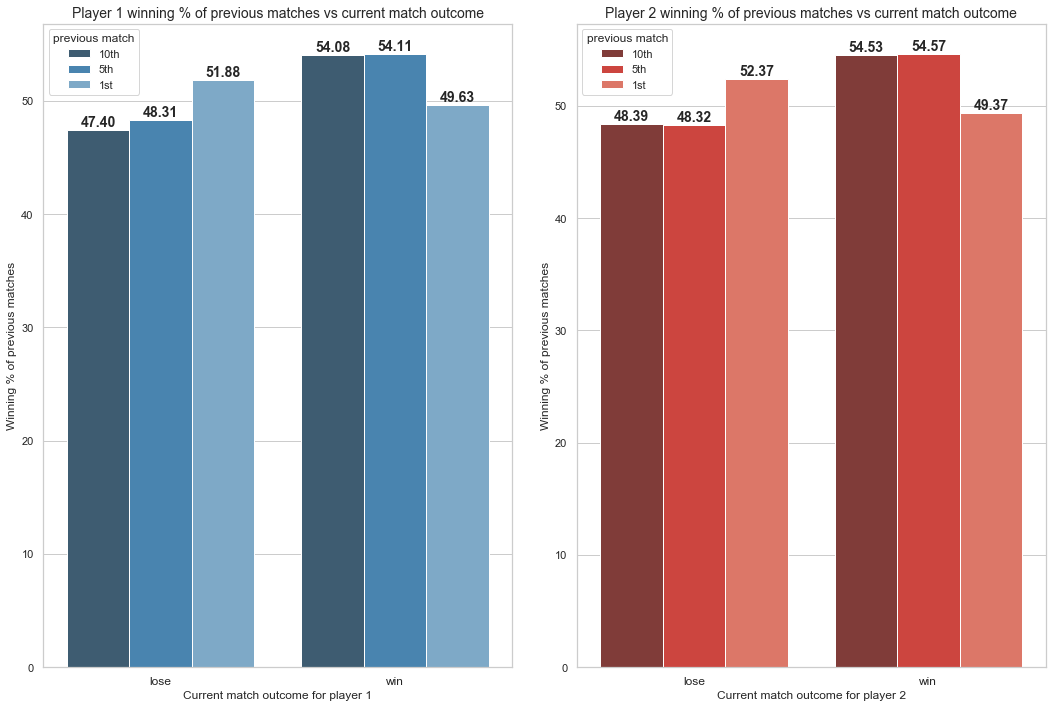

In [413]:
# plotting
fig, ax = plt.subplots(1,2,figsize=(15,10))
sns.barplot(x='outcome', y='value', hue='variable', data=player_1, palette="Blues_d", ci=None, order=[0,1],
                   ax=ax[0])
ax[0].legend(title='previous match', labels=['10th', '5th', '1st'])
ax[0].set_title('Player 1 winning % of previous matches vs current match outcome', size=14)
ax[0].set_ylabel('Winning % of previous matches', size=12)
ax[0].set_xlabel('Current match outcome for player 1', size=12)
ax[0].set_xticklabels(['lose', 'win'], size=12)
for p in ax[0].patches:
    
    ax[0].annotate('{:.2f}'.format(p.get_height()), \
                xy=(p.get_x()+0.06, p.get_height()+0.3), size=14, weight='semibold')
    
sns.barplot(x='outcome', y='value', hue='variable', data=player_2, palette="Reds_d", ci=None, order=[1,0],
           ax=ax[1])
ax[1].legend(title='previous match', labels=['10th', '5th', '1st'])
ax[1].set_title('Player 2 winning % of previous matches vs current match outcome', size=14)
ax[1].set_ylabel('Winning % of previous matches', size=12)
ax[1].set_xlabel('Current match outcome for player 2', size=12)
ax[1].set_xticklabels(['lose', 'win'], size=12)
for p in ax[1].patches:
    
    ax[1].annotate('{:.2f}'.format(p.get_height()), \
                xy=(p.get_x()+0.06, p.get_height()+0.3), size=14, weight='semibold')
plt.tight_layout()
plt.show()

#### Answer: <br/><br/>Technically, there should be no differences between player 1 and player 2 when plotting, the graph showing above was plotted under the same idea, the only difference is the data were coming from different player. We can see from the left graph, given that a player has won the current match, 49.63% of those players have won the previous match, on the right graph the same stat shows 49.37%, the difference must be due to the players pool the data were collected from. On the other hand, if the player has lost the current match, 51.88% has won the previous match on the left and 52.37% has won the previous match on the right, this number should theoretically be similar to each other because they were literally representing the same stats. When we compare previous 1st, 5th and 10th in the same group, interestingly that if a player has lost the current match, there are 51.88%(left) and 52.37%(right) won the previous match. In conclusion, when a player wins the current match, we would think there should be some momentum "carried over" from the previous match(1st), however, the stats showing here are 49.63% and 49.37%, around 50%, this tell us the previous match result did not seem to affect too much on the current match result, but the previous 10th match did show some difference, which has the stat of 54.08% and 54.53%, both are slightly higher than 50%, it is hard to believe that the match that was supposed to have less effect actually shows the desired result, however, this is only the correlation, not the causation. 

#### Question 8: Follow by question 7, what are the relationship between all previous 10 matches and the current match outcome?
As mentioned, this question can be answered either using data from player 1 or player 2, we will pick player 1 since the outcome determined by whether player 1 wins or loses. 

In [410]:
# select all columns related to previous 10 matches result
cols = [i for i in training.columns if 'player_1_win' in i]

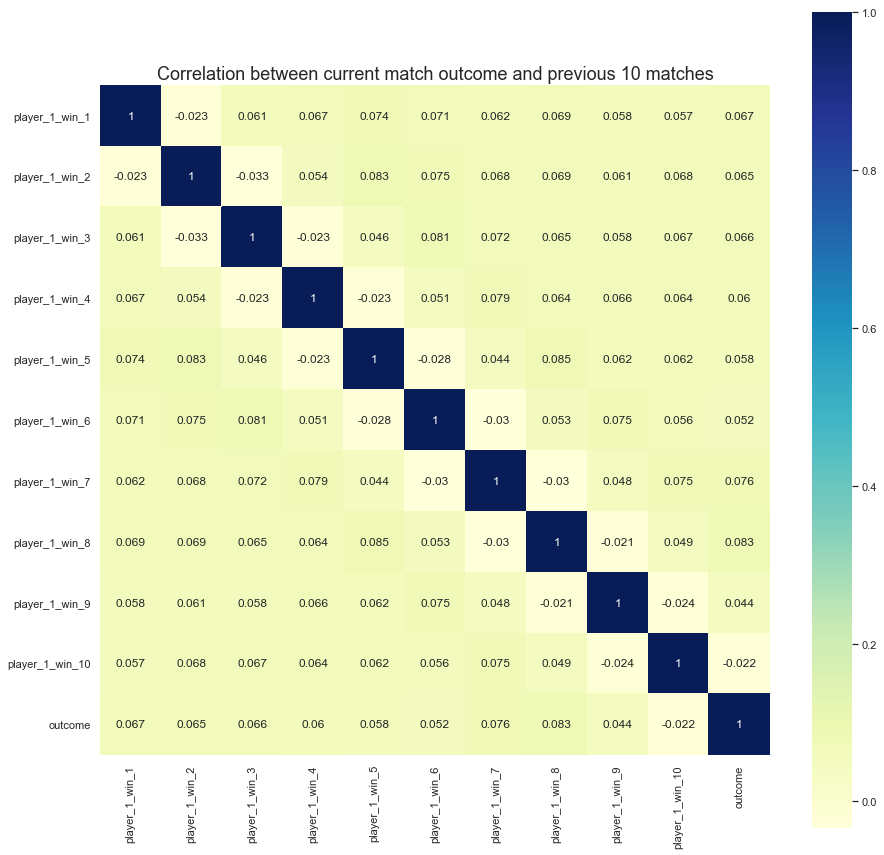

In [411]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
sns.heatmap(training[cols + ['outcome']].corr(), annot=True, cmap="YlGnBu", square=True)
ax.set_title('Correlation between current match outcome and previous 10 matches', size=18)
plt.show()

#### Answer: <br/><br/>We can see that there are little correlation between previous matches win and outcome, however, it looks like there might exist some trends if we look the correlation coefficient column of `outcome` vs others, the number gradually decreased from previous 10th(player_1_win_1) match, 9th, 8th...up to 5th(player_1_win_5) it increased again, we would expect that the 1st match(player_1_win_10) should be more closely related to the performance of the current match since the timelinewise it was supposed to reflect the latest condition. Surprisingly, it even has a slightly negative correlation coefficient(-0.022)! This again proved what we have observed in the previous question, given a player wins the current match, there are slightly less than 50% of those won the previous match. There are another interesting observation that all the adjacent outcomes seem to be negatively related to each other(1st vs 2nd, 2nd vs 3rd...etc.), but the number is pretty close to zero as well. Overall, we did not find much useful information from the plot that might be useful for our prediction model.

## Conclusions
Based on the analysis we have been doing so far, we get to know better of the data, there are several conclusions we could draw from the analysis:
1. From the univariate analysis, we have plotted some distribution plot and histogram to get a better understanding of our variables:
    * Match duration variable is right skewed, it almost guaranteed to have a lower bound but relatively unlimited on the upper bound. Most matches ranged between 75 to 125 minutes.
    * There are several tournaments of a year with different scale, the most often one has 32 draws, followed by the 56 draws, there are only 4 Grand Slam in a single season, but since the draw is 128, the number of matches ranks three in our data.
<br><br/>
2. From the bivariate analysis, we can tell some relationship between variables:
    * Ranking system reflects a player competing condition in the past 12 months, by averaging out the ranking number between winners and losers of the match, we saw a huge difference, winners has a much ranking number than losers, proving the effectiveness of ranking system.
    * Underdog chance of winning again proved the previous idea, the chances of winning a player that has higher rank in all mathces is only around 36.11%.
    * Underdog winning percentage is highest on the carpet court and lowest on the hard court.
    * Underdog winning percentage is highest in July and lowest in May.
    * Underdog winning percentage is highest in 48-draw tournament(ignore 24-draw tournament since there are only six examples) and lowest in 8-draw tournament(ATP final)
    * It is extremely hard to beat the Big 4 for other players, especially in the first two rounds in a single tournament.
    * Big 4 shows the most consistency in Grand Slam, then the ATP 1000, which are the biggest 13 tournament in a single season.
<br><br/>
3. From our training set, it showed that using a few variables are not helpful for predicting the current match outcomes:
    * The previous 1st match that each player plays did not seem to pick up the momentum to affect whether a player is going to win the current match or not. 
    * Correlation plot between current match outcome and previous match results show little correlation.
    * We might need more features to help train the prediction models.
 